# Iris Random Forest Classification

In this notebook, we’ll train a Random Forest on the Iris dataset and then evaluate it using:

1. **Import libraries**  
2. **Load and inspect the Iris data**
3. **Split into train/test**  
4. **Scale features & train a Random Forest**  
5. **Evaluate accuracy, confusion matrix, and full report**
6. **Plot feature importances**

## 1. Import Libraries

In [11]:
import os
import sys

import numpy    as np
import pandas   as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble       import RandomForestClassifier
from sklearn.preprocessing  import StandardScaler
from sklearn.datasets     import load_iris
from sklearn.metrics       import accuracy_score, confusion_matrix, classification_report


import torch
import torch.nn      as nn
import torch.optim  as optim


> **What’s happening?**  
> - **NumPy** & **pandas** for numerical arrays and DataFrame management  
> - **Matplotlib** for plotting charts  
> - **scikit‑learn** modules for data splitting, scaling, Random Forest, and evaluation metrics  
> - **PyTorch** imports reserved for later deep‑learning work (not used in this demo)  
>
> This cell simply loads all of the external tools we’ll need in one place.

## 2. Load and inspect the Iris data

In [10]:
iris = load_iris(as_frame=True)
X    = iris.frame.drop(columns="target")
y    = iris.frame["target"]

print("First five rows of X:")
display(X.head())

print("\nTarget classes:", iris.target_names)

First five rows of X:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



Target classes: ['setosa' 'versicolor' 'virginica']


>**Data inspection:**  
> - `load_iris(as_frame=True)` gives us a pandas DataFrame of 150 samples × 4 features + a `target` column  
> - We drop `target` into **X** (our feature matrix) and keep it in **y** (labels)  
> - `X.head()` shows the first five flowers’ sepal/petal measurements  
> - `iris.target_names` reveals the three species we’ll predict: setosa, versicolor, virginica  
>
> Checking the raw data helps catch issues early (missing values, odd scales, etc.).

## 3. Split into train/test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape, y_train.shape)
print("Test set:    ", X_test.shape,  y_test.shape)

Training set: (120, 4) (120,)
Test set:     (30, 4) (30,)


 >**Train/Test Split:**  
> - We hold out **20%** of samples for testing to gauge generalization  
> - `random_state=42` ensures that if you re‑run this cell, you get the same split  
> - Shapes `(120, 4)` and `(30, 4)` confirm 120 training and 30 test samples  
>
> Always split **before** scaling or training to avoid “data leakage.”

## 4. Scale features & train a Random Forest

In [8]:
scaler = StandardScaler()
# Fit on train only
X_train_scaled = scaler.fit_transform(X_train)
# Apply same transform to test
X_test_scaled  = scaler.transform(X_test)

clf = RandomForestClassifier(
    n_estimators=100,      # number of trees
    max_depth=4,           # maximum depth of each tree
    random_state=42
)
clf.fit(X_train_scaled, y_train)

print("Random Forest has been trained.")

Random Forest has been trained.


 >**Feature Scaling:**  
> - `StandardScaler` subtracts the training‑set mean and divides by the training‑set standard deviation  
> - We **fit** the scaler on `X_train` only, then **transform** both train/test so no peeking at test stats  
>
> **Model Training:**  
> - `RandomForestClassifier(n_estimators=100, max_depth=4)` builds 100 trees, each limited to depth 4  
> - Shallow trees help prevent overfitting on a small dataset  
> - `clf.fit(...)` learns how feature patterns map to species labels


## 5. Evaluate accuracy, confusion matrix, and full report

Accuracy: 1.00



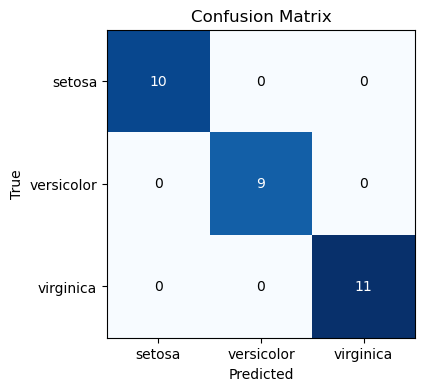

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [7]:
# Accuracy
y_pred = clf.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}\n")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(4,4))
im = ax.imshow(cm, cmap="Blues")
ax.set(
    xticks=[0,1,2], yticks=[0,1,2],
    xticklabels=iris.target_names,
    yticklabels=iris.target_names,
    xlabel="Predicted", ylabel="True",
    title="Confusion Matrix"
)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i,j],
                ha="center", va="center",
                color="white" if cm[i,j]>cm.max()/2 else "black")
plt.show()

# Classification report
print(classification_report(y_test, y_pred, target_names=iris.target_names))

> **Accuracy:**  
> - Proportion of correct predictions (here, 1.00 = 100% correct on our 30‐sample test set)  
>
> **Confusion Matrix:**  
> - Rows = **True** labels, Columns = **Predicted** labels  
> - Diagonal entries show correct counts; off‑diagonals show misclassifications (all zero here)  
>
> **Classification Report:**  
> - **Precision** = TP / (TP + FP): of samples predicted “setosa,” how many actually were setosa  
> - **Recall** = TP / (TP + FN): of actual “versicolor,” how many did we correctly label  
> - **F1‑score** = harmonic mean of precision & recall  
> - **Support** = number of true samples per class  
> - **Macro avg** treats each class equally; **weighted avg** accounts for class frequencies  
>
> These metrics give a fuller picture than accuracy alone.

## 6. Plot feature importances

Feature importances:
 petal length (cm)    0.450058
petal width (cm)     0.423620
sepal length (cm)    0.105099
sepal width (cm)     0.021224
dtype: float64


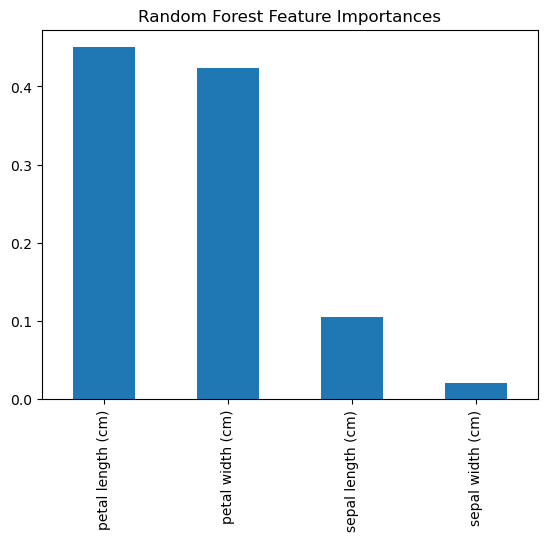

In [6]:
importances = clf.feature_importances_
features = X.columns

# Pair & sort
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)
print("Feature importances:\n", feat_imp)

# Quick bar chart
feat_imp.plot.bar()
plt.title("Random Forest Feature Importances")
plt.show()

> **Feature Importances:**  
> - The Random Forest tracks how much each feature reduces impurity (Gini) across all trees  
> - Higher importance means that feature more often appears in high‐impact splits  
> 
> **Interpretation:**  
> 1. **Petal length** (~0.45) and **petal width** (~0.42) are by far the strongest predictors  
> 2. **Sepal length** (~0.10) and **sepal width** (~0.02) contribute much less  
>
> The bar chart makes it easy to see which measurements the model relied on most.